# Experiment 6 - Hall Effect

### Date: 18/03/2019 - 19/03/2019

### Group Members: Luke Whitehead, Alex Goodenbour, George Robinson

## Introduction

This experiment aims to calculate the Hall coefficient $\ R_H$ for 2 semi-conductors, and use these to calculate the drift velocity for each crystal relative to the drift velocity for copper.

For a conductor of thickness $Z$ in a magnetic field with strength $B$, a current $I$ passing through the conductor generates an electric field with potential $\ V_H$. This Hall potential is given by:

$\ V_H = \frac{R_H B}{Z} I $

Hence, the value of $\ R_H$ for each semi-conductor can be found from the gradient of the plot of $V_H$ vs $I$.



## Method

The experimental set-up consisted of an electromagnet, connected to a constant current power supply; a millivoltmeter; a gaussmeter; and two Hall probes containing a p- and n-type semiconductor. The process was the same for each probe.

The electromagnet was connected to the power supply, which delivered a current of 2A. By changing the direction of current from the supply, the direction of the magnetic field could be reversed. The gaussmeter was used to measure the magnitude of the magnetic field centrally between the poles of the electromagnet. It was noted that reversing the direction of current through the electromagnet changed not only the direction of the field, but also the magnitude of the field. 

The probe for the n-type semi-conductor was placed in the magnetic field and connected to the millivoltmeter, which was used as the current source. Two leads delivered current to the semi-conductor, while another 2 leads measured the voltage perpendicular to the current. This voltage is the Hall voltage. By adjusting the current delivered to the semi-conductor, the Hall voltage could be changed. By maintaining a steady magnetic field, a range of values for $I$ and $V_H$ were measured. To eliminate other thermomagnetic effects, it was important to measure $V_H$ when the current through the semi-conductor was reversed, and take the average of these two readings. Therefore, for each $I$ there were four values of $V_H$ measured, found by reversing the current delivered to the semi-conductor and to the electromagnet.

The process was repeated for the p-type semi-conductor. The data for current and voltages were recorded in a separate data file, and the values of $B$ were recorded in the analysis code below.


Once $\ R_H$ had been found, it could be used to find the drift velocty of the semi-conductor relative to the drift velocity for copper. Drift velocity $v$ is proportional to the current density $J$, which in turn is proportional to the current $I$ and inversely proportional to the dimensions $X$ and $Z$ of the semi-conductor. Hence, $v$ could be found by:

$v=R_H J = \frac{R_H I}{XZ}$

Since the drift velocity of the semi-conductor $v$, relative to that of copper $v_c$, is being sought, the ratio $\frac{v}{v_c}$ is simply the ratio of the Hall coefficients for each conductor. Also, since $\ R_H = \frac{1}{nq}$, where $n$ is the charge-carrier number density and $q$ is the charge of the charge-carrier, this ratio reduces to the following equation, if $\ R_H$ is known for the semi-conductor:

$\frac{v}{v_c}= R_H n_c q$






## Analysis

For each value of $I$, for each semi-conductor, there were four values of $V$ measured - found by reversing the current delivered to the semi-conductor and to the electromagnet. As we found that the calculated values of $R_H$ did not line up for each semi-conductor we decided it would be inappropriate to take an average of two for each semi-conductor and so have done the calculations for each of the 4 values of $R_H$ individually.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal


# Takes numpy array and gets the absolute average
def ave(x):
    return np.array([np.mean(np.abs(a)) for a in x])

# Rounds given decimal to 1 significant figure
def round_to_1(x):
    return round(x, -int(np.floor(np.log10(abs(x)))))

    

# Importing the data
data = np.genfromtxt("hall.csv", delimiter=",")

data1 = np.array(data[:,[0,1,2,3,4]]) # p-type
data2 = np.array(data[:6,[5,6,7,8,9]]) # n-type


# Model for the line of best fit (linear)
def model(p,x):
    return p[0] + p[1]*x


# Extracting data from imported file and calculate absolute mean

Ip = np.array(data1[:,0])
ave_vp1 = ave(np.array(data1[:,[1,2]]))
ave_vp2 = ave(np.array(data1[:,[3,4]]))

In = np.array(data2[:,0])
ave_vn1 = ave(np.array(data2[:,[1,2]]))
ave_vn2 = ave(np.array(data2[:,[3,4]]))


def calculate_uncertainties(a,b):
    # According to the hall effect set-up manual uncertainty in the reading is 0.1% +- one digit
    return a*0.001+0.1,b*0.001+0.1


# Calculating the line of best fit using linear algebra
def bestfit(data, x,y,sigma_x, sigma_y):
    bf = np.zeros((2,len(data)))
    bf[0,:] = x**0
    bf[1,:] = x

    A = np.zeros((2,2))
    b = np.zeros(2)
    for k in range(2):
        for j in range(2):
            A[k,j] = np.sum(bf[k,:]*bf[j,:]/sigma_y**2) 
        b[k] = np.sum(y*bf[k,:]/sigma_y**2)

    A_inv = np.linalg.inv(A)
    a = np.linalg.solve(A,b)
    a_unc = np.sqrt(np.diag(A_inv))[1]
    return a, a_unc

# Calculates the uncertainty in a calculated hall coefficient
def hall_coefficient_unc(grad_unc, grad, B_unc, Z, B):
    return (Z/B)*np.sqrt(grad_unc**2+(0.005*grad)**2)


### VARS for B and Z

B2 = 227e-3 # Tesla
B1 = 214e-3

# Uncertainties according to the Gaussmeter manual
B1_sigma = 0.005*B1
B2_sigma = 0.005*B2

Z = 0.45/1000

# Calculates the hall constant
def get_hall_constant(grad, B):
    return (grad*Z)/B


# Initialising arrays to put calculated values in
hall_coefficients = [0,0,0,0]
hall_coeff_unc = [0,0,0,0]

## Graph One: p-type 1

GRADIENT:  6.5416
GRADIENT UNCERTAINTY:  0.008
Y-INTERCEPT:  1.8074
R_h:  0.01376
R_h Uncertainty:  7.00e-05


Text(2.5, 80, 'Gradient: 6.5416\n$R_h$: 0.0138')

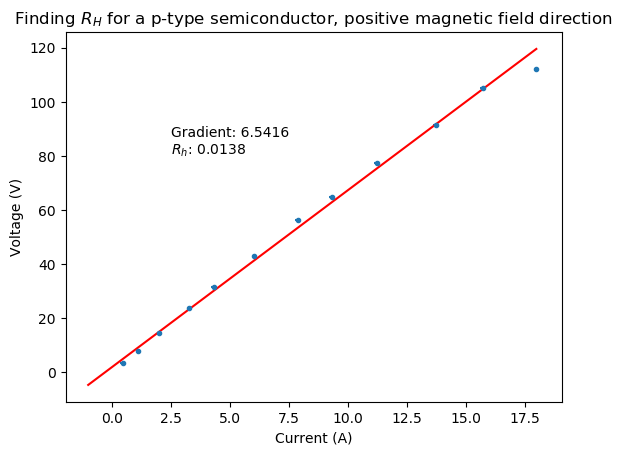

In [2]:
xx = np.linspace(-1,18,1000) # Range for line of best fit

plt.rcdefaults()
plt.figure()

B = B1
B_unc = B1_sigma

x = Ip
y = ave_vp1
sigma_x, sigma_y = calculate_uncertainties(x,y)

a, a_unc = bestfit(data1, x,y,sigma_x, sigma_y)

print("GRADIENT: ", a[1].round(4))
print("GRADIENT UNCERTAINTY: ", round_to_1(a_unc))

print("Y-INTERCEPT: ", a[0].round(4))
R_h = get_hall_constant(a[1], B)
print("R_h: ", R_h.round(5))
hall_coefficients[0] = R_h

R_h_unc = hall_coefficient_unc(a_unc, a[1], B_unc, Z, B)
print("R_h Uncertainty: ","{:.2e}".format(round_to_1(R_h_unc)))
hall_coeff_unc[0] = R_h_unc

plt.errorbar(x,y,sigma_y, sigma_x, fmt='.')
plt.plot(xx,model(a,xx),'r-')
plt.title("Finding $R_H$ for a p-type semiconductor, positive magnetic field direction")
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.annotate("Gradient: "+str(a[1].round(4))+'\n'+
             "$R_h$: "+str(R_h.round(4)), (2.5,80))

## Graph Two: p-type 2


GRADIENT:  10.3509
GRADIENT UNCERTAINTY:  0.01
Y-INTERCEPT:  1.0384
R_h:  0.02052
R_h Uncertainty:  1.00e-04


Text(2.5, 80, 'Gradient: 10.3509\n$R_h$: 0.0205')

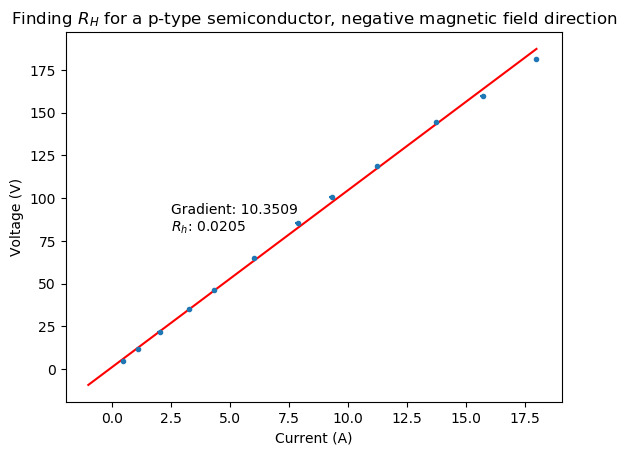

In [3]:
xx = np.linspace(-1,18,1000) # Range for line of best fit

plt.rcdefaults()
plt.figure()

B = B2
B_unc = B2_sigma

x = Ip
y = ave_vp2
sigma_x, sigma_y = calculate_uncertainties(x,y)

a, a_unc = bestfit(data1, x,y,sigma_x, sigma_y)

print("GRADIENT: ", a[1].round(4))
print("GRADIENT UNCERTAINTY: ", round_to_1(a_unc))

print("Y-INTERCEPT: ", a[0].round(4))
R_h = get_hall_constant(a[1], B)
print("R_h: ", R_h.round(5))
hall_coefficients[1] = R_h

R_h_unc = hall_coefficient_unc(a_unc, a[1], B_unc, Z, B)
print("R_h Uncertainty: ","{:.2e}".format(round_to_1(R_h_unc)))
hall_coeff_unc[1] = R_h_unc

plt.errorbar(x,y,sigma_y, sigma_x, fmt='.')
plt.plot(xx,model(a,xx),'r-')
plt.title("Finding $R_H$ for a p-type semiconductor, negative magnetic field direction")
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.annotate("Gradient: "+str(a[1].round(4))+'\n'+
             "$R_h$: "+str(R_h.round(4)), (2.5,80))

## Graph Three: n-type 1

GRADIENT:  5.3156
GRADIENT UNCERTAINTY:  0.01
Y-INTERCEPT:  1.1786
R_h:  0.01118
R_h Uncertainty:  6.00e-05


Text(2.5, 80, 'Gradient: 5.3156\n$R_h$: 0.0112')

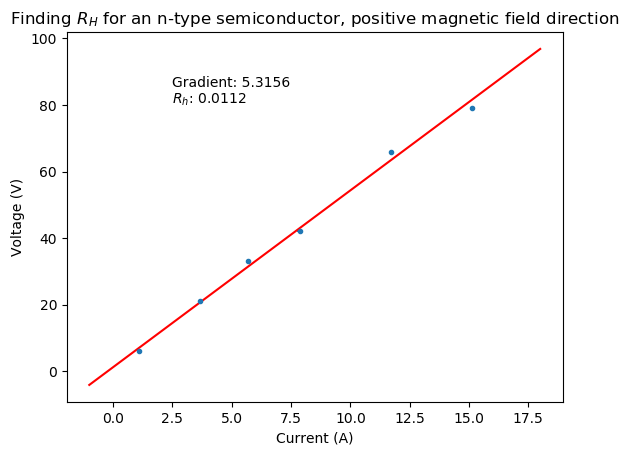

In [4]:
xx = np.linspace(-1,18,1000) # Range for line of best fit

plt.rcdefaults()
plt.figure()

B = B1
B_unc = B1_sigma

x = In
y = ave_vn1
sigma_x, sigma_y = calculate_uncertainties(x,y)

a, a_unc = bestfit(data2, x,y,sigma_x, sigma_y)


print("GRADIENT: ", a[1].round(4))
print("GRADIENT UNCERTAINTY: ", round_to_1(a_unc))

print("Y-INTERCEPT: ", a[0].round(4))
R_h = get_hall_constant(a[1], B)
print("R_h: ", R_h.round(5))
hall_coefficients[2] = R_h

R_h_unc = hall_coefficient_unc(a_unc, a[1], B_unc, Z, B)
print("R_h Uncertainty: ","{:.2e}".format(round_to_1(R_h_unc)))
hall_coeff_unc[2] = R_h_unc
plt.errorbar(x,y,sigma_y, sigma_x, fmt='.')
plt.plot(xx,model(a,xx),'r-')
plt.title("Finding $R_H$ for an n-type semiconductor, positive magnetic field direction")
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.annotate("Gradient: "+str(a[1].round(4))+'\n'+
             "$R_h$: "+str(R_h.round(4)), (2.5,80))

## Graph Four: 1-type 2

GRADIENT:  6.858
GRADIENT UNCERTAINTY:  0.01
Y-INTERCEPT:  1.6414
R_h:  0.0136
R_h Uncertainty:  7.00e-05


Text(2.5, 80, 'Gradient: 6.858\n$R_h$: 0.0136')

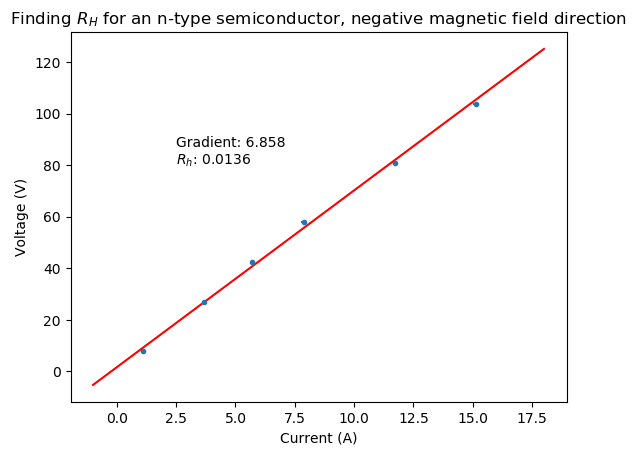

In [5]:
xx = np.linspace(-1,18,1000) # Range for line of best fit 

plt.rcdefaults()
plt.figure()

B = B2
B_unc = B2_sigma

x = In
y = ave_vn2
sigma_x, sigma_y = calculate_uncertainties(x,y)

a, a_unc = bestfit(data2, x,y,sigma_x, sigma_y)

print("GRADIENT: ", a[1].round(4))
print("GRADIENT UNCERTAINTY: ", round_to_1(a_unc))

print("Y-INTERCEPT: ", a[0].round(4))
R_h = get_hall_constant(a[1], B)
print("R_h: ", R_h.round(5))
hall_coefficients[3] = R_h

R_h_unc = hall_coefficient_unc(a_unc, a[1], B_unc, Z, B)
print("R_h Uncertainty: ","{:.2e}".format(round_to_1(R_h_unc)))
hall_coeff_unc[3] = R_h_unc

plt.errorbar(x,y,sigma_y, sigma_x, fmt='.')
plt.plot(xx,model(a,xx),'r-')
plt.title("Finding $R_H$ for an n-type semiconductor, negative magnetic field direction")
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.annotate("Gradient: "+str(a[1].round(4))+'\n'+
             "$R_h$: "+str(R_h.round(4)), (2.5,80))

## Calculating Drift Velocity Ratio between semiconductor and copper

In [6]:
def drift_velocity_ratio(R_h):
    n_c = 8.5e28 # Charge carrier number density of copper
    q = 1.5e-19  # Charge on the charge carrier
    return n_c*q*R_h

# Calculates drift velocity uncertainty
def drift_velocity_unc(R_h_unc, R_h, vel):
    return (R_h_unc/R_h)*vel
    

for index, coeff in enumerate(hall_coefficients):
    print
    print("DRIFT VELOCITY RATIO ",index+1,": ", "{:.2e}".format(drift_velocity_ratio(coeff)))
    print("UNCERTAINTY: ", "{:.2e}".format(round_to_1(drift_velocity_unc(hall_coeff_unc[index], hall_coefficients[index], drift_velocity_ratio(coeff)))))
    print()

DRIFT VELOCITY RATIO  1 :  1.75e+08
UNCERTAINTY:  9.00e+05

DRIFT VELOCITY RATIO  2 :  2.62e+08
UNCERTAINTY:  1.00e+06

DRIFT VELOCITY RATIO  3 :  1.43e+08
UNCERTAINTY:  8.00e+05

DRIFT VELOCITY RATIO  4 :  1.73e+08
UNCERTAINTY:  9.00e+05



## Conclusion

The aim of this experiment was to determine the hall coefficients $\ R_H$ of two semiconductors, one p-type and one n-type. This was calculated by the relationship $V = \frac{R_HB}{Z}I$. Using the gradient of our line of best fit we find, $R_h = \frac{mZ}{B}$, where $m$ is the gradient. The values of the hall coefficient for each semi-conductor and for each direction of the magnetic field were determined to be $R_H= 0.01376$, with uncertainty $7\times 10^{-5}$ for a p-type semi-conductor with positive magnetic field direction, $R_H= 0.02052$, with uncertainty $10\times 10^{-5}$ for a p-type semi-conductor with negative magnetic field direction, $R_H= 0.01118$, with uncertainty $6\times 10^{-5}$ for an n-type semi-conductor with positive magnetic field direction, $R_H= 0.01360$, with uncertainty $7\times 10^{-5}$ for an n-type semi-conductor with negative magnetic field direction.

With the benefit of hindsight, better methods could have been used to record voltage and current. For example if we had set up a system through which we could reverse current direction for the two sets of apparatus automatically, this would would have likely reduced the uncertainty in our measurements, as to reduce the potential for a spark due to a high flux, the current through the electromagnet had to be manually adjusted each time the its current was reversed.

Upon repeating this experiment, we would most likely attempt to use another method of uncertainty calculation as it seems that the sources used in calculating our uncertainties may give lower uncertainties than would be possible with sources of variation such as having to manually correct the current through the electromagnet for each direction of current flow.

The uncertainty due to an inability to keep fixed variables constant was the largest source of uncertainty in this experiment. We were also limited by the equipment as our voltmeter could only read voltages up to a certain point and so only current of up to around 18mA could be used. If we did not have this limitation we would have been able to collect more data points and thus reduce the uncertainty in our gradient and therefore reduce the uncertainty in our calculations of $R_H$ and drift velocity.